# Seoul Bike Rental Prediction

## Overview

In this project, you will apply some popular machine learning techniques to the problem of predicting bike rental demand. A data set has been provided containing records of bike rentals in Seoul, collected during 2017-18.

The scenario for this project is that you are a new employee of a company (that rents bikes, alongside other activities) and you have been assigned the task of predicting the bike rentals. Your line manager has given you some instructions (those shown below) but is expecting you to be able to do this task without close supervision and to report back with understandable and concise text, graphics and code (and of course the company wants a copy of all the code required to perform this task). Naturally, you are wanting to show that you are a valuable member of the company and although the company allows the use of ChatGPT, you will want to show that you are making useful contributions and that you bring value to the company beyond just being able to type instructions into ChatGPT, as otherwise the company might replace you with a cheaper data entry employee. Hence, you should use ChatGPT whenever you like (or whenever instructed to - see later) but do highlight how your own knowledge and judgement makes a contribution.

The main aims of this project are: 

- to practice using tools for loading and viewing data sets;
- to check data for common pitfalls and clean it up;
- to plan a simple experiment and prepare the data accordingly;
- to run your experiment and to report and interpret your results clearly and concisely.

This project relates to the following ACS CBOK areas: abstraction, design, hardware and software, data and information, HCI and programming.


In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

import sklearn
assert sklearn.__version__ >= "0.20"

import pandas as pd
assert pd.__version__ >= "1.0"

# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

## 1: Loading and initial processing of the dataset

Download the data set `SeoulBikeData.csv` in the GitHub repository. 

The data is stored in a CSV (comma separated values) file and contains the following information 

 - Date: year-month-day
 - Rented Bike Count: Count of bikes rented at each hour
 - Hour: Hour of the day
 - Temperature: Temperature in degrees Celsius
 - Humidity: %
 - Windspeed: m/s
 - Visibility: 10m
 - Dew point temperature: degrees Celsius
 - Solar radiation: MJ/m2
 - Rainfall: mm
 - Snowfall: cm
 - Seasons: Winter, Spring, Summer, Autumn
 - Holiday: Holiday/No holiday
 - Functional Day: NoFunc(Non Functional Hours), Fun(Functional hours)

### 1.1 Load and visualise the data

**Load the data set from the csv file into a DataFrame, summarise it in text using one pandas function, and then visualise each feature with one type of plot (this can be different for each feature).**

#### Load the dataset

In [2]:
data_path = "SeoulBikeData.csv"
seoulbike = pd.read_csv(data_path)

# take a quick look at the data structure
seoulbike.head()

,Date,Rented Bike Count,Hour,Temperature (C),Humidity (%),Wind speed (m/s),Visibility (10m),Dew point temperature (C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37.0,2.2,2000,-17.6,0,0,0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38.0,0.8,2000,-17.6,0,0,0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39.0,1.0,2000,-17.7,0,0,0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40.0,0.9,2000,-17.6,0,0,0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36.0,2.3,2000,-18.6,0,0,0,Winter,No Holiday,Yes


In [3]:
# check missing data
missing_values = seoulbike.isnull().sum()
print(missing_values)

Date                         0
Rented Bike Count            0
Hour                         0
Temperature (C)              0
Humidity (%)                 0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature (C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64


In [4]:
# check data type
seoulbike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature (C)            8760 non-null   float64
 4   Humidity (%)               8760 non-null   float64
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature (C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   object 
 9   Rainfall(mm)               8760 non-null   object 
 10  Snowfall (cm)              8760 non-null   object 
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

#### Convert 3 variables to float and non-numerical data will be replaced by NA

I think 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)' should be numerical variables.

In [5]:
columns_to_convert = ['Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']

for col in columns_to_convert:
    seoulbike[col] = pd.to_numeric(seoulbike[col], errors='coerce')
    
seoulbike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature (C)            8760 non-null   float64
 4   Humidity (%)               8760 non-null   float64
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature (C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8759 non-null   float64
 9   Rainfall(mm)               8739 non-null   float64
 10  Snowfall (cm)              8739 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [6]:
missing_values = seoulbike.isnull().sum()
print(missing_values)

Date                          0
Rented Bike Count             0
Hour                          0
Temperature (C)               0
Humidity (%)                  0
Wind speed (m/s)              0
Visibility (10m)              0
Dew point temperature (C)     0
Solar Radiation (MJ/m2)       1
Rainfall(mm)                 21
Snowfall (cm)                21
Seasons                       0
Holiday                       0
Functioning Day               0
dtype: int64


#### Summarize

In [7]:
# the numerical attributes
seoulbike.describe()

,Rented Bike Count,Hour,Temperature (C),Humidity (%),Wind speed (m/s),Visibility (10m),Dew point temperature (C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8759.000000,8739.000000,8739.000000
mean,714.876027,11.500000,12.945765,58.268014,1.848950,1436.825799,4.073813,0.569017,0.149045,0.086486
std,1160.468927,6.922582,12.376168,20.807845,10.665215,608.298712,13.060369,0.869311,1.129524,1.145001
min,0.000000,0.000000,-17.800000,-2.200000,-0.700000,27.000000,-30.600000,0.000000,0.000000,-0.400000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1066.000000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,90997.000000,23.000000,195.000000,455.000000,991.100000,2000.000000,27.200000,5.520000,35.000000,99.000000


In [8]:
# the categorical attributes:
print(seoulbike["Date"].value_counts())

print(seoulbike["Seasons"].value_counts())

print(seoulbike["Holiday"].value_counts())

print(seoulbike["Functioning Day"].value_counts())

Date
01/12/2017    24
09/08/2018    24
07/08/2018    24
06/08/2018    24
05/08/2018    24
              ..
31/03/2018    24
30/03/2018    24
29/03/2018    24
28/03/2018    24
30/11/2018    24
Name: count, Length: 365, dtype: int64
Seasons
Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: count, dtype: int64
Holiday
No Holiday    8328
Holiday        432
Name: count, dtype: int64
Functioning Day
Yes    8465
No      295
Name: count, dtype: int64


#### Visualise each feature: Visualise the distibution, find outliers and errors

1. Rented Bike Count


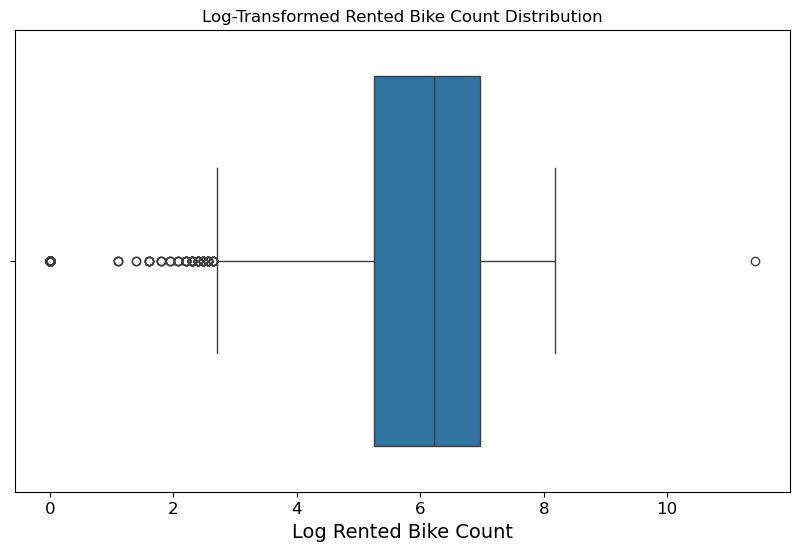

In [9]:
import seaborn as sns

# Boxplot shows the distribution of Rented Bike Count
seoulbike['Log Rented Bike Count'] = np.log1p(seoulbike['Rented Bike Count'])
plt.figure(figsize=(10, 6))
sns.boxplot(x=seoulbike['Log Rented Bike Count'])
plt.title("Log-Transformed Rented Bike Count Distribution")
plt.xlabel('Log Rented Bike Count')
plt.show()

# drop 'Log Rented Bike Count' after using it.
seoulbike.drop(columns=['Log Rented Bike Count'], inplace=True)

# I can see an outlier.

2. Date

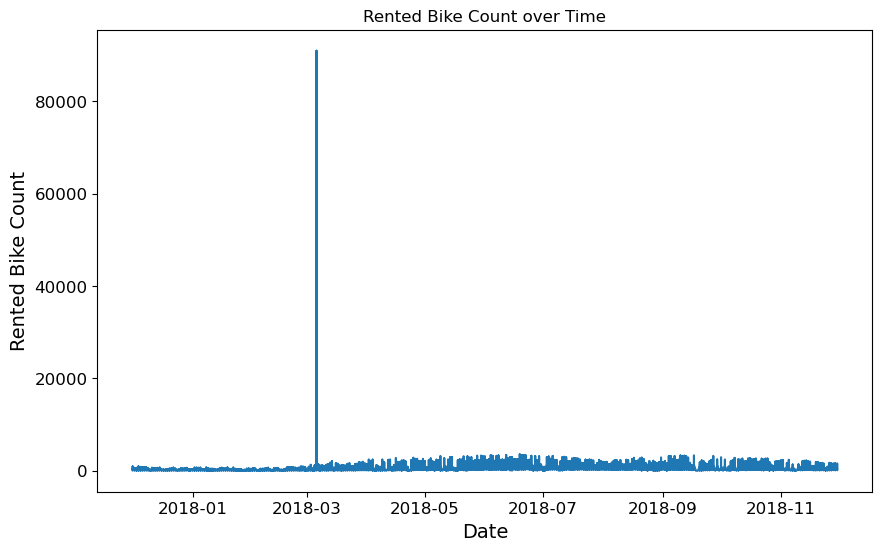

In [10]:
# Time Series Plot: Rented Bike Count over Time
plt.figure(figsize=(10, 6))
seoulbike['Date'] = pd.to_datetime(seoulbike['Date'], dayfirst=True)
plt.plot(seoulbike['Date'], seoulbike['Rented Bike Count'])
plt.title("Rented Bike Count over Time")
plt.ylabel('Rented Bike Count')
plt.xlabel('Date')
plt.show()

# I can see an outlier (rented bike count > 80000).

3. Hour

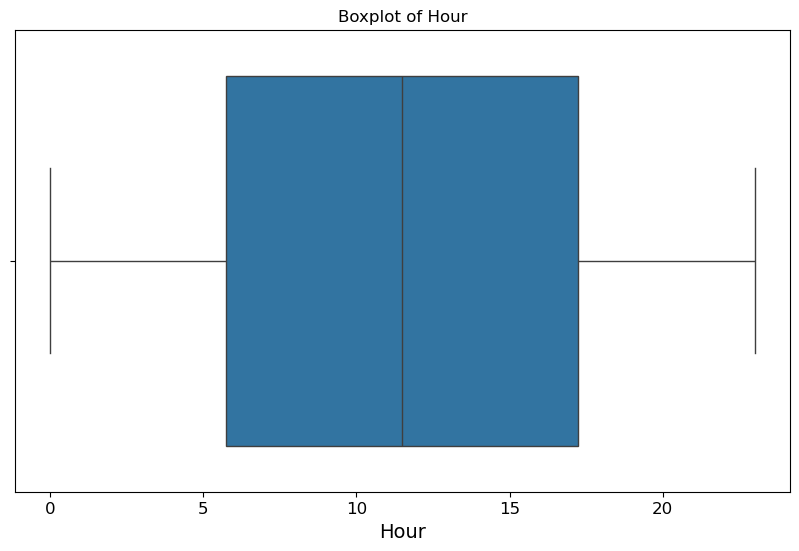

In [11]:
# Boxplot shows the distribution of hour
plt.figure(figsize=(10, 6))
sns.boxplot(x=seoulbike['Hour'])
plt.title("Boxplot of Hour")
plt.xlabel('Hour')
plt.show()

# It looks good.

4. Temperature

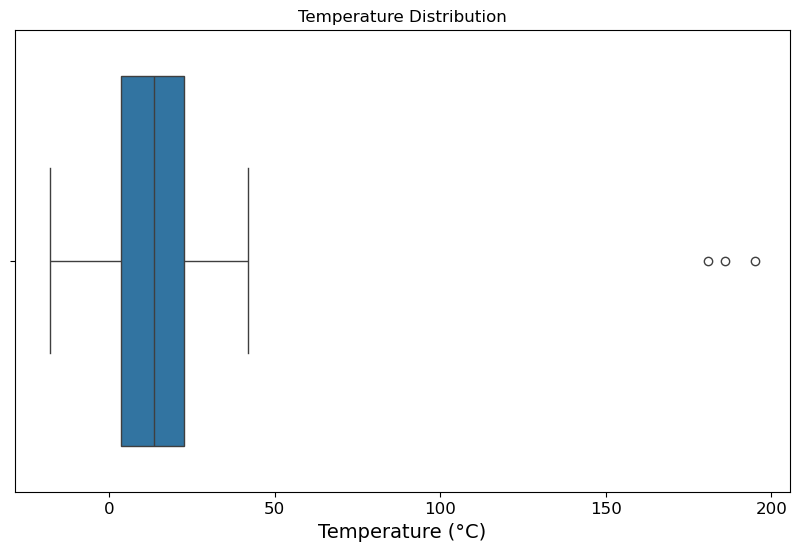

In [12]:
# Boxplot shows the distribution of temperature
plt.figure(figsize=(10, 6))
sns.boxplot(x=seoulbike['Temperature (C)'])
plt.title("Temperature Distribution")
plt.xlabel('Temperature (°C)')
plt.show()

# I can see 3 outliers (Temperature > 150°C).

5. Humidity

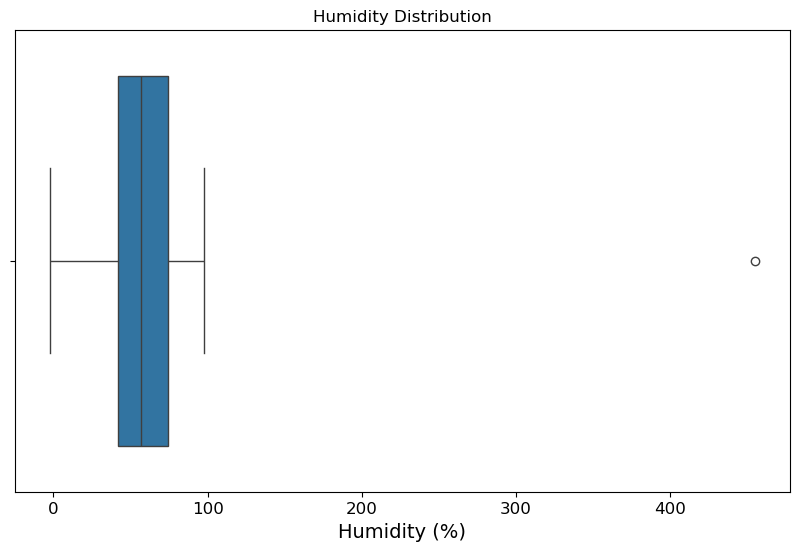

In [13]:
# Boxplot shows the distribution of humidity
plt.figure(figsize=(10, 6))
sns.boxplot(x=seoulbike['Humidity (%)'])
plt.title("Humidity Distribution")
plt.xlabel('Humidity (%)')
plt.show()

# I can see an outlier (Humidity > 400) and some errors (Humidity = 0).

6. Wind speed

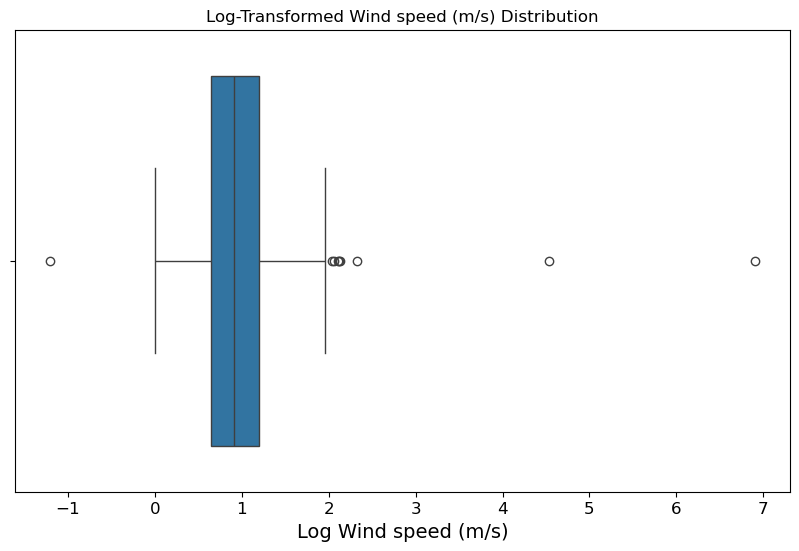

In [14]:
# 6. Box plot showing the distribution of wind speed
seoulbike['Log Wind speed (m/s)'] = np.log1p(seoulbike['Wind speed (m/s)'])
plt.figure(figsize=(10, 6))
sns.boxplot(x=seoulbike['Log Wind speed (m/s)'])
plt.title("Log-Transformed Wind speed (m/s) Distribution")
plt.xlabel('Log Wind speed (m/s)')
plt.show()

# drop 'Log Wind speed (m/s)' after using it.
seoulbike.drop(columns=['Log Wind speed (m/s)'], inplace=True)

# I can see some outliers and an error (Log Wind speed < 0).

7. Visibility

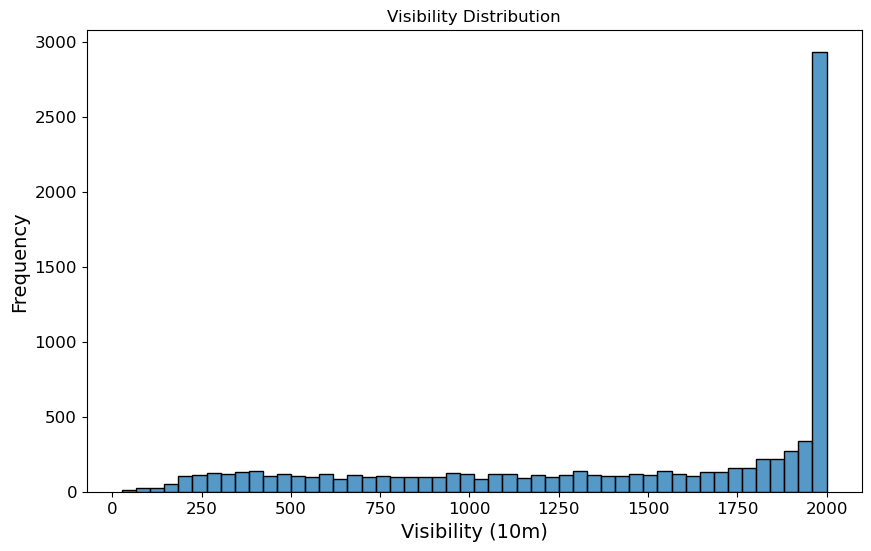

In [15]:
# Histogram shows the distribution of visibility
plt.figure(figsize=(10, 6))
sns.histplot(seoulbike['Visibility (10m)'], bins=50)
plt.title("Visibility Distribution")
plt.xlabel('Visibility (10m)')
plt.ylabel('Frequency')
plt.show()

# It looks good.

8. Dew point temperature

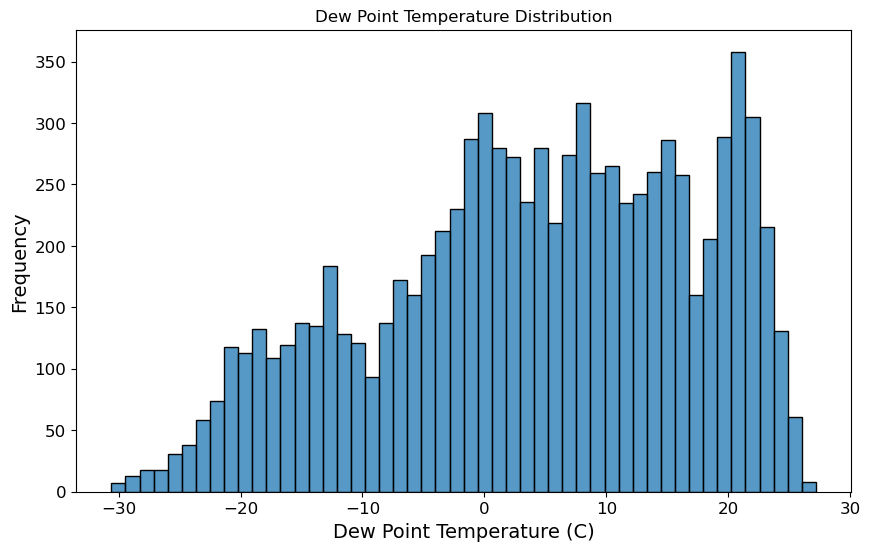

In [16]:
# Histogram shows the distribution of dew point temperature
plt.figure(figsize=(10, 6))
sns.histplot(seoulbike['Dew point temperature (C)'], bins=50)
plt.title("Dew Point Temperature Distribution")
plt.xlabel('Dew Point Temperature (C)')
plt.ylabel('Frequency')
plt.show()

# It looks good.

9. Solar Radiation

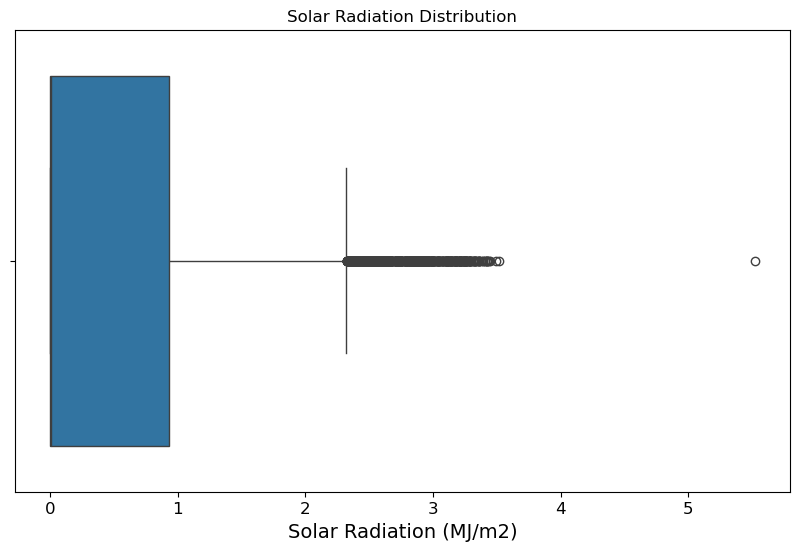

In [17]:
# Boxplot shows the distribution of solar radiation
plt.figure(figsize=(10, 6))
sns.boxplot(x=seoulbike['Solar Radiation (MJ/m2)'])
plt.title("Solar Radiation Distribution")
plt.xlabel('Solar Radiation (MJ/m2)')
plt.show()

# I can see an outlier.


10. Rainfall

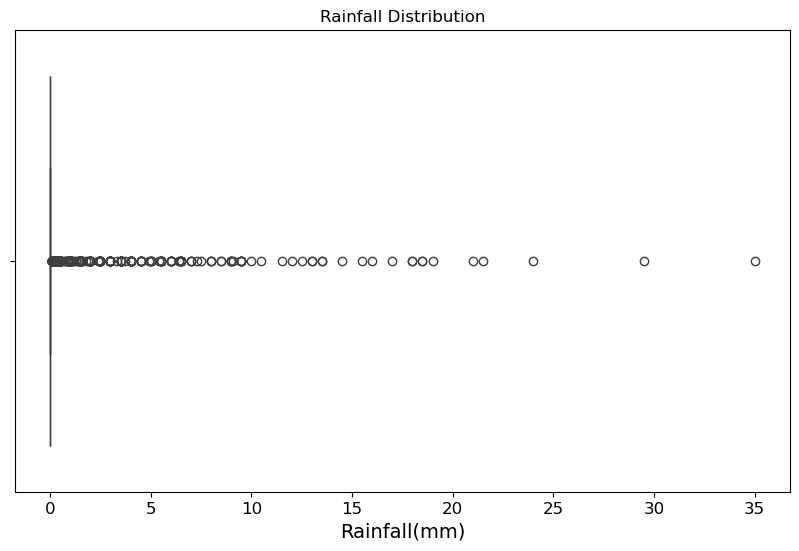

In [18]:
# Boxplot shows the distribution of rainfall
plt.figure(figsize=(10, 6))
sns.boxplot(x=seoulbike['Rainfall(mm)'])
plt.title("Rainfall Distribution")
plt.xlabel('Rainfall(mm)')
plt.show()

# It looks good, but has some outliers.

11. Snowfall

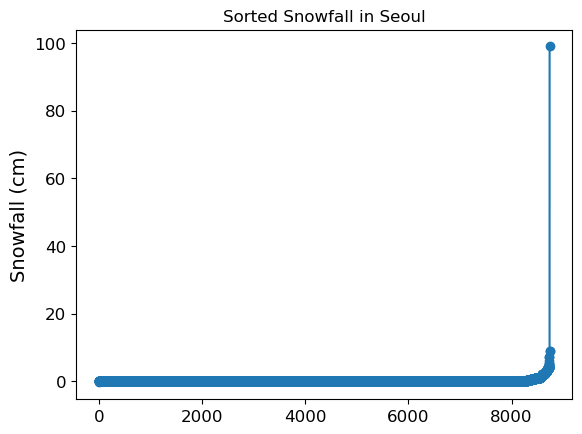

In [19]:
# Visualise using sorted values of snowfall
plt.plot(np.sort(seoulbike['Snowfall (cm)']),'-o')
plt.title("Sorted Snowfall in Seoul")
plt.ylabel('Snowfall (cm)')
plt.show()

# I can see an outlier and may has some negative value.

12. Seasons

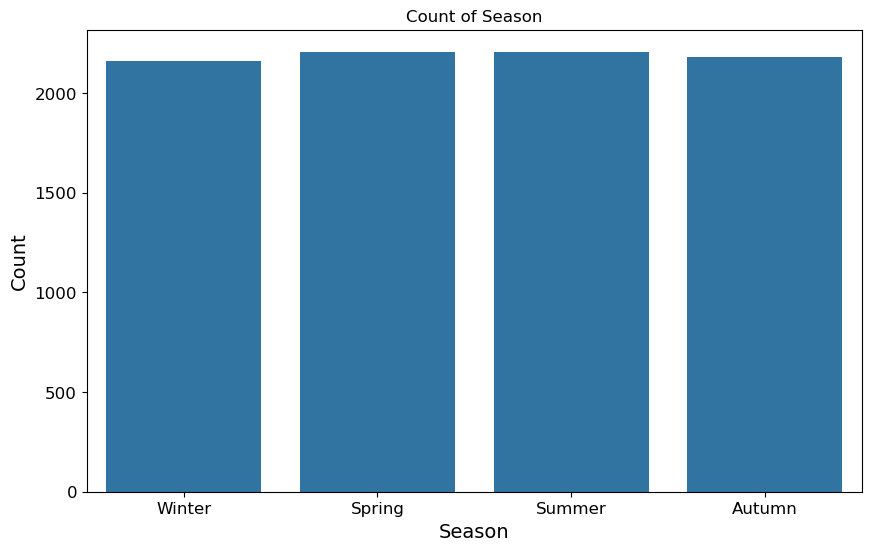

In [20]:
# Count plot shows the distribution of season
plt.figure(figsize=(10, 6))
f11 = sns.countplot(x='Seasons', data=seoulbike)
plt.title('Count of Season')
plt.xlabel('Season')
plt.ylabel('Count')
plt.show()

# It looks good.

13. Holiday

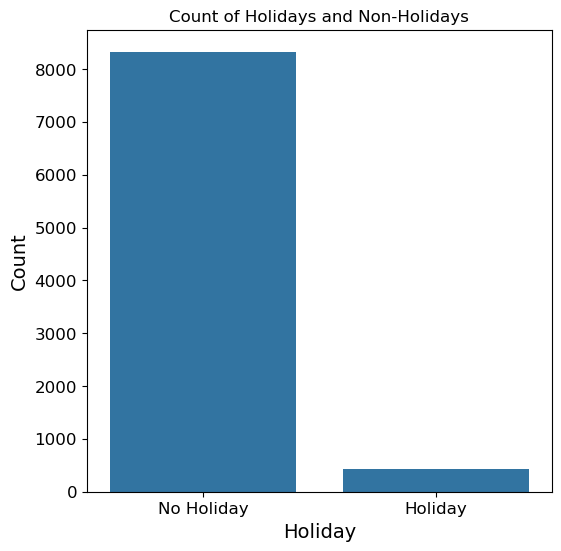

In [21]:
# Count plot shows the distribution of holiday status)
plt.figure(figsize=(6, 6))
f12 = sns.countplot(x='Holiday', data=seoulbike)
plt.title('Count of Holidays and Non-Holidays')
plt.xlabel('Holiday')
plt.ylabel('Count')
plt.show()

# It looks good.

14. Functional Day

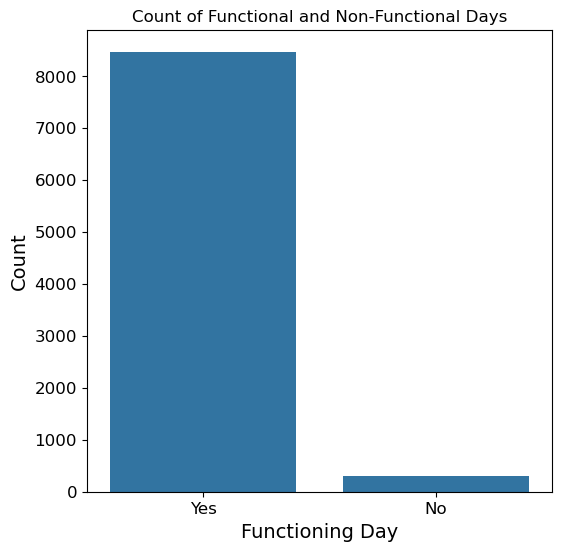

In [22]:
# Count plot shows the distribution of functional status
plt.figure(figsize=(6, 6))
f13 = sns.countplot(x='Functioning Day', data=seoulbike)
plt.title('Count of Functional and Non-Functional Days')
plt.xlabel('Functioning Day')
plt.ylabel('Count')
plt.show()

# It looks good.

### 1.2 Cleaning the data

Do the following to the data:
 - Using the "Functioning day" feature, **remove rows from the DataFrame** where the business is closed and then **delete the Functioning Day feature from the DataFrame**.
 - **Convert seasons to a one hot encoded format** (1 binary feature for each of the 4 seasons).
 - Replace the **Date** feature with a binary **Weekday** feature (1 for a weekday and 0 for weekend) using the code sample below or your own code.
 - **Convert remaining non-numerical features to a numerical format** or replace with NaN (i.e. `np.nan`) where not possible.
 - **Identify and fix any outliers and errors in the data**.

Save the result as a new csv file called `CleanedSeoulBikeData.csv` and **upload this** to MyUni along with this notebook when you submit your project.

In [23]:
seoulbike

,Date,Rented Bike Count,Hour,Temperature (C),Humidity (%),Wind speed (m/s),Visibility (10m),Dew point temperature (C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,2017-12-01,254,0,-5.2,37.0,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,2017-12-01,204,1,-5.5,38.0,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,2017-12-01,173,2,-6.0,39.0,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,2017-12-01,107,3,-6.2,40.0,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,2017-12-01,78,4,-6.0,36.0,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-11-30,1003,19,4.2,34.0,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,2018-11-30,764,20,3.4,37.0,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,2018-11-30,694,21,2.6,39.0,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,2018-11-30,712,22,2.1,41.0,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [24]:
missing_values = seoulbike.isnull().sum()
print(missing_values)

Date                          0
Rented Bike Count             0
Hour                          0
Temperature (C)               0
Humidity (%)                  0
Wind speed (m/s)              0
Visibility (10m)              0
Dew point temperature (C)     0
Solar Radiation (MJ/m2)       1
Rainfall(mm)                 21
Snowfall (cm)                21
Seasons                       0
Holiday                       0
Functioning Day               0
dtype: int64


In [25]:
seoulbike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   int64         
 2   Hour                       8760 non-null   int64         
 3   Temperature (C)            8760 non-null   float64       
 4   Humidity (%)               8760 non-null   float64       
 5   Wind speed (m/s)           8760 non-null   float64       
 6   Visibility (10m)           8760 non-null   int64         
 7   Dew point temperature (C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)    8759 non-null   float64       
 9   Rainfall(mm)               8739 non-null   float64       
 10  Snowfall (cm)              8739 non-null   float64       
 11  Seasons                    8760 non-null   object        
 12  Holida

#### Identify and fix any outliers and errors in the data

In [26]:
# sort Rented Bike Count (target variable) to find outliers
sorted_data = seoulbike.sort_values(by='Rented Bike Count', ascending=False)
sorted_data

,Date,Rented Bike Count,Hour,Temperature (C),Humidity (%),Wind speed (m/s),Visibility (10m),Dew point temperature (C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
2288,2018-03-06,90997,8,-0.7,76.0,1.0,1461,-4.4,0.20,0.0,0.0,Spring,No Holiday,Yes
4818,2018-06-19,3556,18,24.1,57.0,2.9,1301,15.0,0.56,0.0,0.0,Summer,No Holiday,Yes
4866,2018-06-21,3418,18,27.8,43.0,3.0,1933,14.0,1.35,0.0,0.0,Summer,No Holiday,Yes
4650,2018-06-12,3404,18,24.9,53.0,3.6,2000,14.6,1.28,0.0,0.0,Summer,No Holiday,Yes
4842,2018-06-20,3384,18,27.0,55.0,3.1,1246,17.1,1.26,0.0,0.0,Summer,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3158,2018-04-11,0,14,16.4,28.0,3.4,1804,-2.1,3.16,0.0,0.0,Spring,No Holiday,No
7376,2018-10-04,0,8,13.9,68.0,0.9,1912,8.0,0.34,0.0,0.0,Autumn,No Holiday,No
3157,2018-04-11,0,13,15.6,38.0,4.7,1558,1.3,3.32,0.0,0.0,Spring,No Holiday,No
7288,2018-09-30,0,16,21.2,28.0,3.2,2000,1.9,1.77,0.0,0.0,Autumn,No Holiday,No


In [27]:
# check data on 2018-03-06
outlier_date = seoulbike[seoulbike['Date'] == '2018-03-06']
outlier_date

,Date,Rented Bike Count,Hour,Temperature (C),Humidity (%),Wind speed (m/s),Visibility (10m),Dew point temperature (C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
2280,2018-03-06,224,0,1.3,69.0,0.8,2000,-3.7,0.00,0.0,0.0,Spring,No Holiday,Yes
2281,2018-03-06,188,1,0.8,67.0,0.8,2000,-4.6,0.00,0.0,0.0,Spring,No Holiday,Yes
2282,2018-03-06,122,2,0.3,71.0,0.9,1999,-4.3,0.00,0.0,0.0,Spring,No Holiday,Yes
2283,2018-03-06,82,3,0.1,71.0,0.4,2000,-4.5,0.00,0.0,0.0,Spring,No Holiday,Yes
2284,2018-03-06,79,4,-0.5,75.0,0.6,1967,-4.3,0.00,0.0,0.0,Spring,No Holiday,Yes
2285,2018-03-06,80,5,-0.9,78.0,0.6,1687,-4.2,0.00,0.0,0.0,Spring,No Holiday,Yes
2286,2018-03-06,214,6,-1.0,77.0,0.4,1578,-4.5,0.00,0.0,0.0,Spring,No Holiday,Yes
2287,2018-03-06,583,7,-1.0,78.0,0.6,1484,-4.3,0.00,0.0,0.0,Spring,No Holiday,Yes
2288,2018-03-06,90997,8,-0.7,76.0,1.0,1461,-4.4,0.20,0.0,0.0,Spring,No Holiday,Yes
2289,2018-03-06,556,9,1.2,62.0,0.8,1338,-5.2,0.85,0.0,0.0,Spring,No Holiday,Yes


In [28]:
# delete the outlier of the target value 'Rented Bike Count'
outlier_index = seoulbike[seoulbike['Rented Bike Count'] == 90997].index
seoulbike.drop(index=outlier_index, inplace=True)

In [29]:
# Check categorical features: find outliers and fix it
# check 'Hour' value
hour_counts = seoulbike['Hour'].value_counts().sort_index()
print("Hour counts:\n", hour_counts)

# check 'Seasons' value
seasons_counts = seoulbike['Seasons'].value_counts().sort_index()
print("\nSeasons counts:\n", seasons_counts)

# check 'Holiday' vaule
holiday_counts = seoulbike['Holiday'].value_counts().sort_index()
print("\nHoliday counts:\n", holiday_counts)

# check 'Functioning Day' value
functioning_day_counts = seoulbike['Functioning Day'].value_counts().sort_index()
print("\nFunctioning Day counts:\n", functioning_day_counts)

# They all look good.

Hour counts:
 Hour
0     365
1     365
2     365
3     365
4     365
5     365
6     365
7     365
8     364
9     365
10    365
11    365
12    365
13    365
14    365
15    365
16    365
17    365
18    365
19    365
20    365
21    365
22    365
23    365
Name: count, dtype: int64

Seasons counts:
 Seasons
Autumn    2184
Spring    2207
Summer    2208
Winter    2160
Name: count, dtype: int64

Holiday counts:
 Holiday
Holiday        432
No Holiday    8327
Name: count, dtype: int64

Functioning Day counts:
 Functioning Day
No      295
Yes    8464
Name: count, dtype: int64


In [30]:
# sort numerical features to find outliers and fix them
# sort 'Temperature (C)' to find outliers
sorted_data = seoulbike.sort_values(by='Temperature (C)', ascending=False)
sorted_data

,Date,Rented Bike Count,Hour,Temperature (C),Humidity (%),Wind speed (m/s),Visibility (10m),Dew point temperature (C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
4370,2018-06-01,554,2,195.0,72.0,1.4,1258,13.8,0.00,0.0,0.0,Summer,No Holiday,Yes
4371,2018-06-01,366,3,186.0,72.0,1.4,1340,13.4,0.00,0.0,0.0,Summer,No Holiday,Yes
4372,2018-06-01,265,4,181.0,76.0,1.8,561,13.7,0.00,0.0,0.0,Summer,No Holiday,Yes
202,2017-12-09,273,10,42.0,-2.2,1.3,1646,-13.4,0.61,0.0,0.0,Winter,No Holiday,Yes
5848,2018-08-01,561,16,39.4,39.0,2.5,1897,22.8,2.42,0.0,0.0,Summer,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1349,2018-01-26,36,5,-16.9,38.0,2.3,2000,-27.9,0.00,0.0,0.5,Winter,No Holiday,Yes
1350,2018-01-26,64,6,-17.4,40.0,1.6,2000,-27.7,0.00,0.0,0.5,Winter,No Holiday,Yes
1351,2018-01-26,142,7,-17.5,38.0,3.4,2000,-28.4,0.00,0.0,0.5,Winter,No Holiday,Yes
1353,2018-01-26,149,9,-17.5,37.0,3.8,1941,-28.7,0.21,0.0,0.5,Winter,No Holiday,Yes


In [31]:
# I find 3 outliers are all on 2018-06-01, check it
outlier_date = seoulbike[seoulbike['Date'] == '2018-06-01']
outlier_date

,Date,Rented Bike Count,Hour,Temperature (C),Humidity (%),Wind speed (m/s),Visibility (10m),Dew point temperature (C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
4368,2018-06-01,963,0,20.1,63.0,1.1,1698,12.8,0.00,0.0,99.0,Summer,No Holiday,Yes
4369,2018-06-01,776,1,19.5,65.0,0.4,1662,12.7,0.00,0.0,0.0,Summer,No Holiday,Yes
4370,2018-06-01,554,2,195.0,72.0,1.4,1258,13.8,0.00,0.0,0.0,Summer,No Holiday,Yes
4371,2018-06-01,366,3,186.0,72.0,1.4,1340,13.4,0.00,0.0,0.0,Summer,No Holiday,Yes
4372,2018-06-01,265,4,181.0,76.0,1.8,561,13.7,0.00,0.0,0.0,Summer,No Holiday,Yes
4373,2018-06-01,306,5,17.8,75.0,1.0,1210,13.3,0.00,0.0,0.0,Summer,No Holiday,Yes
4374,2018-06-01,672,6,17.5,76.0,1.2,1161,13.2,0.05,0.0,0.0,Summer,No Holiday,Yes
4375,2018-06-01,1421,7,18.1,64.0,0.6,923,11.1,0.47,0.0,0.0,Summer,No Holiday,Yes
4376,2018-06-01,2149,8,20.6,55.0,0.7,1200,11.2,1.21,0.0,0.0,Summer,No Holiday,Yes
4377,2018-06-01,1219,9,23.1,52.0,1.7,1012,12.6,1.88,0.0,0.0,Summer,No Holiday,Yes


In [32]:
# I think it may be some input errors, fix them
seoulbike.loc[seoulbike['Temperature (C)'] == 195.0, 'Temperature (C)'] = 19.5
seoulbike.loc[seoulbike['Temperature (C)'] == 186.0, 'Temperature (C)'] = 18.6
seoulbike.loc[seoulbike['Temperature (C)'] == 181.0, 'Temperature (C)'] = 18.1

In [33]:
# sort 'Humidity (%)' to find outliers
sorted_data = seoulbike.sort_values(by='Humidity (%)', ascending=False)
sorted_data

,Date,Rented Bike Count,Hour,Temperature (C),Humidity (%),Wind speed (m/s),Visibility (10m),Dew point temperature (C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
950,2018-01-09,265,14,-1.8,455.0,3.7,1922,-12.1,1.06,0.0,0.2,Winter,No Holiday,Yes
6501,2018-08-28,122,21,22.9,98.0,2.1,1146,22.5,0.00,29.5,0.0,Summer,No Holiday,Yes
4016,2018-05-17,152,8,19.7,98.0,0.5,1958,19.3,0.12,13.5,0.0,Spring,No Holiday,Yes
4015,2018-05-17,80,7,19.1,98.0,0.3,125,18.7,0.00,0.0,0.0,Spring,No Holiday,Yes
4014,2018-05-17,69,6,18.9,98.0,0.3,338,18.5,0.00,0.0,0.0,Spring,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4110,2018-05-21,467,6,11.4,0.0,0.9,2000,-2.0,0.03,0.0,0.0,Spring,No Holiday,Yes
4063,2018-05-19,436,7,11.4,0.0,1.4,2000,4.5,0.46,0.0,0.0,Spring,No Holiday,Yes
4109,2018-05-21,200,5,11.9,0.0,1.3,2000,-2.7,0.00,0.0,0.0,Spring,No Holiday,Yes
4108,2018-05-21,113,4,12.4,0.0,0.8,2000,-3.4,0.00,0.0,0.0,Spring,No Holiday,Yes


In [34]:
# I find an outlier '455.0', check it
outlier_date = seoulbike[seoulbike['Date'] == '2018-01-09']
outlier_date

,Date,Rented Bike Count,Hour,Temperature (C),Humidity (%),Wind speed (m/s),Visibility (10m),Dew point temperature (C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
936,2018-01-09,100,0,-1.2,67.0,4.6,983,-6.5,0.00,0.0,1.0,Winter,No Holiday,Yes
937,2018-01-09,107,1,-1.9,69.0,5.0,791,-6.8,0.00,0.0,1.0,Winter,No Holiday,Yes
938,2018-01-09,75,2,-2.9,66.0,3.3,1515,-8.3,0.00,0.0,1.0,Winter,No Holiday,Yes
939,2018-01-09,52,3,-3.4,67.0,3.2,1420,-8.6,0.00,0.0,0.9,Winter,No Holiday,Yes
940,2018-01-09,38,4,-4.3,59.0,4.4,1451,-11.1,0.00,0.0,0.9,Winter,No Holiday,Yes
941,2018-01-09,52,5,-5.1,48.0,3.2,1821,-14.4,0.00,0.0,0.9,Winter,No Holiday,Yes
942,2018-01-09,126,6,-5.6,52.0,3.7,1785,-13.9,0.00,0.0,0.9,Winter,No Holiday,Yes
943,2018-01-09,245,7,-5.9,57.0,3.1,1686,-13.0,0.00,0.0,0.8,Winter,No Holiday,Yes
944,2018-01-09,554,8,-6.0,64.0,3.2,1384,-11.7,0.00,0.0,0.7,Winter,No Holiday,Yes
945,2018-01-09,320,9,-6.0,61.0,2.5,1547,-12.3,0.13,0.0,0.6,Winter,No Holiday,Yes


In [35]:
# I think it may be some input errors, fix it
seoulbike.loc[seoulbike['Humidity (%)'] == 455.0, 'Humidity (%)'] = 45.5
outlier_date = seoulbike[seoulbike['Date'] == '2018-01-09']
outlier_date

,Date,Rented Bike Count,Hour,Temperature (C),Humidity (%),Wind speed (m/s),Visibility (10m),Dew point temperature (C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
936,2018-01-09,100,0,-1.2,67.0,4.6,983,-6.5,0.00,0.0,1.0,Winter,No Holiday,Yes
937,2018-01-09,107,1,-1.9,69.0,5.0,791,-6.8,0.00,0.0,1.0,Winter,No Holiday,Yes
938,2018-01-09,75,2,-2.9,66.0,3.3,1515,-8.3,0.00,0.0,1.0,Winter,No Holiday,Yes
939,2018-01-09,52,3,-3.4,67.0,3.2,1420,-8.6,0.00,0.0,0.9,Winter,No Holiday,Yes
940,2018-01-09,38,4,-4.3,59.0,4.4,1451,-11.1,0.00,0.0,0.9,Winter,No Holiday,Yes
941,2018-01-09,52,5,-5.1,48.0,3.2,1821,-14.4,0.00,0.0,0.9,Winter,No Holiday,Yes
942,2018-01-09,126,6,-5.6,52.0,3.7,1785,-13.9,0.00,0.0,0.9,Winter,No Holiday,Yes
943,2018-01-09,245,7,-5.9,57.0,3.1,1686,-13.0,0.00,0.0,0.8,Winter,No Holiday,Yes
944,2018-01-09,554,8,-6.0,64.0,3.2,1384,-11.7,0.00,0.0,0.7,Winter,No Holiday,Yes
945,2018-01-09,320,9,-6.0,61.0,2.5,1547,-12.3,0.13,0.0,0.6,Winter,No Holiday,Yes


In [36]:
# I find an outlier -2.2, check it
outlier_date = seoulbike[seoulbike['Date'] == '2017-12-09']
outlier_date

,Date,Rented Bike Count,Hour,Temperature (C),Humidity (%),Wind speed (m/s),Visibility (10m),Dew point temperature (C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
192,2017-12-09,267,0,-3.5,48.0,0.9,1967,-12.9,0.00,0.0,0.0,Winter,No Holiday,Yes
193,2017-12-09,296,1,-4.1,49.0,0.6,2000,-13.2,0.00,0.0,0.0,Winter,No Holiday,Yes
194,2017-12-09,237,2,-4.7,50.0,0.7,1983,-13.5,0.00,0.0,0.0,Winter,No Holiday,Yes
195,2017-12-09,169,3,-4.3,47.0,0.6,1992,-13.9,0.00,0.0,0.0,Winter,No Holiday,Yes
196,2017-12-09,96,4,-4.3,49.0,0.7,2000,-13.4,0.00,0.0,0.0,Winter,No Holiday,Yes
197,2017-12-09,56,5,-4.7,49.0,0.8,1999,-13.8,0.00,0.0,0.0,Winter,No Holiday,Yes
198,2017-12-09,76,6,-5.1,53.0,0.9,1975,-13.2,0.00,0.0,0.0,Winter,No Holiday,Yes
199,2017-12-09,127,7,-5.5,56.0,0.8,1950,-12.9,0.00,0.0,0.0,Winter,No Holiday,Yes
200,2017-12-09,222,8,-5.4,56.0,0.7,1940,-12.8,0.01,0.0,0.0,Winter,No Holiday,Yes
201,2017-12-09,291,9,-4.7,48.0,1.0,1784,-14.0,0.23,0.0,0.0,Winter,No Holiday,Yes


In [37]:
# it seems like Temperature and Humidity are reversed, fix them
condition = (seoulbike['Temperature (C)'] == 42.0) & (seoulbike['Humidity (%)'] == -2.2)
seoulbike.loc[condition, ['Temperature (C)', 'Humidity (%)']] = seoulbike.loc[condition, ['Humidity (%)', 'Temperature (C)']].values

# check it
seoulbike[condition]

,Date,Rented Bike Count,Hour,Temperature (C),Humidity (%),Wind speed (m/s),Visibility (10m),Dew point temperature (C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
202,2017-12-09,273,10,-2.2,42.0,1.3,1646,-13.4,0.61,0.0,0.0,Winter,No Holiday,Yes


In [38]:
# I think Humidity can't be 0 in real world, convert 0 to NA
seoulbike.loc[seoulbike['Humidity (%)'] == 0, 'Humidity (%)'] = np.nan

In [39]:
# sort 'Wind speed (m/s)' to find outliers
sorted_data = seoulbike.sort_values(by='Wind speed (m/s)', ascending=False)
sorted_data

,Date,Rented Bike Count,Hour,Temperature (C),Humidity (%),Wind speed (m/s),Visibility (10m),Dew point temperature (C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
2860,2018-03-30,115,4,9.9,67.0,991.1,820,4.0,0.0,0.0,0.0,Spring,No Holiday,Yes
2861,2018-03-30,117,5,10.4,62.0,91.8,911,3.4,0.0,0.0,0.0,Spring,No Holiday,Yes
2862,2018-03-30,284,6,10.3,70.0,9.2,555,5.0,0.0,0.0,0.0,Spring,No Holiday,Yes
3134,2018-04-10,913,14,21.2,35.0,7.4,1992,5.1,1.8,0.0,0.0,Spring,No Holiday,Yes
3141,2018-04-10,133,21,17.5,70.0,7.3,1634,11.9,0.0,0.5,0.0,Spring,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8164,2018-11-06,0,4,9.1,81.0,0.0,493,6.0,0.0,0.0,0.0,Autumn,No Holiday,No
112,2017-12-05,435,16,-0.5,30.0,0.0,2000,-16.0,0.0,0.0,0.0,Winter,No Holiday,Yes
111,2017-12-05,353,15,-0.7,28.0,0.0,2000,-16.9,0.0,0.0,0.0,Winter,No Holiday,Yes
113,2017-12-05,529,17,-1.6,35.0,0.0,2000,-15.1,0.0,0.0,0.0,Winter,No Holiday,Yes


In [40]:
# I find 4 outliers are all on 2018-03-30, check it
outlier_date = seoulbike[seoulbike['Date'] == '2018-03-30']
outlier_date

,Date,Rented Bike Count,Hour,Temperature (C),Humidity (%),Wind speed (m/s),Visibility (10m),Dew point temperature (C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
2856,2018-03-30,490,0,11.8,78.0,0.6,438,8.0,0.00,0.0,0.0,Spring,No Holiday,Yes
2857,2018-03-30,401,1,11.4,77.0,-0.7,466,7.5,0.00,0.0,0.0,Spring,No Holiday,Yes
2858,2018-03-30,261,2,10.8,72.0,0.4,639,5.9,0.00,0.0,0.0,Spring,No Holiday,Yes
2859,2018-03-30,184,3,10.3,68.0,0.7,887,4.6,0.00,0.0,0.0,Spring,No Holiday,Yes
2860,2018-03-30,115,4,9.9,67.0,991.1,820,4.0,0.00,0.0,0.0,Spring,No Holiday,Yes
2861,2018-03-30,117,5,10.4,62.0,91.8,911,3.4,0.00,0.0,0.0,Spring,No Holiday,Yes
2862,2018-03-30,284,6,10.3,70.0,9.2,555,5.0,0.00,0.0,0.0,Spring,No Holiday,Yes
2863,2018-03-30,747,7,10.5,70.0,1.1,483,5.2,0.04,0.0,0.0,Spring,No Holiday,Yes
2864,2018-03-30,1406,8,11.5,60.0,1.6,550,3.9,0.42,0.0,0.0,Spring,No Holiday,Yes
2865,2018-03-30,772,9,13.7,46.0,1.3,972,2.2,1.08,0.0,0.0,Spring,No Holiday,Yes


In [41]:
# convert 3 outliers to NA
outlier_index = seoulbike[seoulbike['Wind speed (m/s)'] == 991.1].index
seoulbike.loc[outlier_index, 'Wind speed (m/s)'] = np.nan

outlier_index = seoulbike[seoulbike['Wind speed (m/s)'] == 91.8].index
seoulbike.loc[outlier_index, 'Wind speed (m/s)'] = np.nan

outlier_index = seoulbike[seoulbike['Wind speed (m/s)'] == 9.2].index
seoulbike.loc[outlier_index, 'Wind speed (m/s)'] = np.nan

# I think -0.7 is an input error, convert it to positive value
outlier_index = seoulbike[seoulbike['Wind speed (m/s)'] == -0.7].index
seoulbike.loc[outlier_index, 'Wind speed (m/s)'] = abs(seoulbike.loc[outlier_index, 'Wind speed (m/s)'])

# check it
seoulbike.loc[outlier_index]

,Date,Rented Bike Count,Hour,Temperature (C),Humidity (%),Wind speed (m/s),Visibility (10m),Dew point temperature (C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
2857,2018-03-30,401,1,11.4,77.0,0.7,466,7.5,0.0,0.0,0.0,Spring,No Holiday,Yes


In [42]:
# sort 'Visibility (10m)' to find outliers
sorted_data = seoulbike.sort_values(by='Visibility (10m)', ascending=False)
sorted_data

# It looks good

,Date,Rented Bike Count,Hour,Temperature (C),Humidity (%),Wind speed (m/s),Visibility (10m),Dew point temperature (C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,2017-12-01,254,0,-5.2,37.0,2.2,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
6430,2018-08-25,1717,22,23.4,75.0,1.6,2000,18.7,0.00,0.0,0.0,Summer,No Holiday,Yes
6428,2018-08-25,2022,20,24.6,65.0,2.9,2000,17.5,0.00,0.0,0.0,Summer,No Holiday,Yes
6427,2018-08-25,2043,19,25.8,62.0,3.3,2000,17.9,0.27,0.0,0.0,Summer,No Holiday,Yes
6425,2018-08-25,1797,17,26.9,60.0,2.8,2000,18.4,0.77,0.0,0.0,Summer,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2764,2018-03-26,65,4,5.5,96.0,2.0,53,4.9,0.00,0.0,0.0,Spring,No Holiday,Yes
2765,2018-03-26,98,5,5.4,97.0,1.5,38,4.9,0.00,0.0,0.0,Spring,No Holiday,Yes
8601,2018-11-24,24,9,0.3,97.0,3.0,34,-0.1,0.00,9.1,7.1,Autumn,No Holiday,Yes
8600,2018-11-24,33,8,0.4,96.0,3.1,33,-0.1,0.00,0.0,4.0,Autumn,No Holiday,Yes


In [43]:
# sort 'Dew point temperature (C)' to find outliers
sorted_data = seoulbike.sort_values(by='Dew point temperature (C)', ascending=False)
sorted_data

# It looks good

,Date,Rented Bike Count,Hour,Temperature (C),Humidity (%),Wind speed (m/s),Visibility (10m),Dew point temperature (C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
6115,2018-08-12,1117,19,32.0,76.0,2.1,692,27.2,0.10,1.0,0.0,Summer,No Holiday,Yes
5750,2018-07-28,314,14,34.4,65.0,1.8,960,26.8,1.75,0.2,0.0,Summer,No Holiday,Yes
6116,2018-08-12,1208,20,29.4,86.0,1.1,1194,26.8,0.03,4.0,0.0,Summer,No Holiday,Yes
5936,2018-08-05,309,8,27.5,95.0,0.7,404,26.6,0.14,1.6,0.0,Summer,No Holiday,Yes
5751,2018-07-28,468,15,28.9,86.0,2.2,1592,26.3,0.26,7.3,0.0,Summer,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1301,2018-01-24,34,5,-15.6,29.0,3.7,2000,-29.6,0.00,0.0,0.9,Winter,No Holiday,Yes
1302,2018-01-24,71,6,-15.7,29.0,2.5,2000,-29.7,0.00,0.0,0.9,Winter,No Holiday,Yes
1304,2018-01-24,364,8,-16.2,30.0,1.6,2000,-29.8,0.00,0.0,0.9,Winter,No Holiday,Yes
1305,2018-01-24,192,9,-15.8,27.0,3.4,2000,-30.5,0.20,0.0,0.9,Winter,No Holiday,Yes


In [44]:
# sort 'Solar Radiation (MJ/m2)' to find outliers
sorted_data = seoulbike.sort_values(by='Solar Radiation (MJ/m2)', ascending=False)
sorted_data

# It looks good

,Date,Rented Bike Count,Hour,Temperature (C),Humidity (%),Wind speed (m/s),Visibility (10m),Dew point temperature (C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
4069,2018-05-19,1865,13,21.9,39.0,2.0,2000,7.3,5.52,0.0,0.0,Spring,No Holiday,Yes
4165,2018-05-23,1167,13,20.9,33.0,3.9,1853,4.0,3.52,0.0,0.0,Spring,No Holiday,Yes
4117,2018-05-21,1456,13,22.8,31.0,1.9,1923,4.7,3.49,0.0,0.0,Spring,No Holiday,Yes
6205,2018-08-16,652,13,35.1,39.0,2.0,2000,19.0,3.45,0.0,0.0,Summer,No Holiday,Yes
4164,2018-05-23,1216,12,20.1,37.0,4.0,1910,4.9,3.44,0.0,0.0,Spring,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3477,2018-04-24,1372,21,11.5,47.0,1.1,2000,0.5,0.00,0.0,0.0,Spring,No Holiday,Yes
3476,2018-04-24,1332,20,12.6,49.0,0.8,2000,2.1,0.00,0.0,0.0,Spring,No Holiday,Yes
3462,2018-04-24,262,6,9.6,87.0,2.0,2000,7.5,0.00,0.0,0.0,Spring,No Holiday,Yes
8759,2018-11-30,584,23,1.9,43.0,1.3,1909,-9.3,0.00,0.0,0.0,Autumn,No Holiday,Yes


In [45]:
# sort 'Rainfall(mm)' to find outliers
sorted_data = seoulbike.sort_values(by='Rainfall(mm)', ascending=False)
sorted_data

# It looks good

,Date,Rented Bike Count,Hour,Temperature (C),Humidity (%),Wind speed (m/s),Visibility (10m),Dew point temperature (C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
3997,2018-05-16,151,13,21.8,97.0,2.4,682,21.2,0.06,35.0,0.0,Spring,No Holiday,Yes
6501,2018-08-28,122,21,22.9,98.0,2.1,1146,22.5,0.00,29.5,0.0,Summer,No Holiday,Yes
5132,2018-07-02,61,20,23.5,97.0,0.1,1814,22.9,0.04,24.0,0.0,Summer,No Holiday,Yes
5034,2018-06-28,596,18,20.6,97.0,0.7,222,20.1,0.14,21.5,0.0,Summer,No Holiday,Yes
6524,2018-08-29,19,20,23.4,98.0,0.6,70,23.0,0.00,21.0,0.0,Summer,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1411,2018-01-28,134,19,-6.0,31.0,3.6,2000,-20.4,0.00,NaN,NaN,Winter,No Holiday,Yes
1412,2018-01-28,113,20,-7.0,30.0,2.8,2000,-21.6,0.00,NaN,NaN,Winter,No Holiday,Yes
1413,2018-01-28,106,21,-7.3,34.0,3.5,2000,-20.5,0.00,NaN,NaN,Winter,No Holiday,Yes
1414,2018-01-28,105,22,-7.9,40.0,2.5,1997,-19.1,0.00,NaN,NaN,Winter,No Holiday,Yes


In [46]:
# check if any negative value of Rainfall
negative_rainfall_condition = seoulbike['Rainfall(mm)'] < 0

print("Negative Rainfall values:\n", seoulbike[negative_rainfall_condition])

Negative Rainfall values:
 Empty DataFrame
Columns: [Date, Rented Bike Count, Hour, Temperature (C), Humidity (%), Wind speed (m/s), Visibility (10m), Dew point temperature (C), Solar Radiation (MJ/m2), Rainfall(mm), Snowfall (cm), Seasons, Holiday, Functioning Day]
Index: []


In [47]:
# sort 'Snowfall (cm)' to find outliers
sorted_data = seoulbike.sort_values(by='Snowfall (cm)', ascending=False)
sorted_data

,Date,Rented Bike Count,Hour,Temperature (C),Humidity (%),Wind speed (m/s),Visibility (10m),Dew point temperature (C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
4368,2018-06-01,963,0,20.1,63.0,1.1,1698,12.8,0.00,0.0,99.0,Summer,No Holiday,Yes
8602,2018-11-24,62,10,0.4,97.0,1.8,207,0.0,0.00,0.0,8.8,Autumn,No Holiday,Yes
8603,2018-11-24,114,11,1.2,97.0,2.3,975,0.7,0.07,0.0,8.8,Autumn,No Holiday,Yes
8601,2018-11-24,24,9,0.3,97.0,3.0,34,-0.1,0.00,9.1,7.1,Autumn,No Holiday,Yes
8604,2018-11-24,167,12,2.5,84.0,1.9,1538,0.0,0.40,1.8,7.0,Autumn,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1411,2018-01-28,134,19,-6.0,31.0,3.6,2000,-20.4,0.00,NaN,NaN,Winter,No Holiday,Yes
1412,2018-01-28,113,20,-7.0,30.0,2.8,2000,-21.6,0.00,NaN,NaN,Winter,No Holiday,Yes
1413,2018-01-28,106,21,-7.3,34.0,3.5,2000,-20.5,0.00,NaN,NaN,Winter,No Holiday,Yes
1414,2018-01-28,105,22,-7.9,40.0,2.5,1997,-19.1,0.00,NaN,NaN,Winter,No Holiday,Yes


In [48]:
# I find an outlier on 2018-03-30, check it
outlier_date = seoulbike[seoulbike['Date'] == '2018-06-01']
outlier_date

,Date,Rented Bike Count,Hour,Temperature (C),Humidity (%),Wind speed (m/s),Visibility (10m),Dew point temperature (C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
4368,2018-06-01,963,0,20.1,63.0,1.1,1698,12.8,0.00,0.0,99.0,Summer,No Holiday,Yes
4369,2018-06-01,776,1,19.5,65.0,0.4,1662,12.7,0.00,0.0,0.0,Summer,No Holiday,Yes
4370,2018-06-01,554,2,19.5,72.0,1.4,1258,13.8,0.00,0.0,0.0,Summer,No Holiday,Yes
4371,2018-06-01,366,3,18.6,72.0,1.4,1340,13.4,0.00,0.0,0.0,Summer,No Holiday,Yes
4372,2018-06-01,265,4,18.1,76.0,1.8,561,13.7,0.00,0.0,0.0,Summer,No Holiday,Yes
4373,2018-06-01,306,5,17.8,75.0,1.0,1210,13.3,0.00,0.0,0.0,Summer,No Holiday,Yes
4374,2018-06-01,672,6,17.5,76.0,1.2,1161,13.2,0.05,0.0,0.0,Summer,No Holiday,Yes
4375,2018-06-01,1421,7,18.1,64.0,0.6,923,11.1,0.47,0.0,0.0,Summer,No Holiday,Yes
4376,2018-06-01,2149,8,20.6,55.0,0.7,1200,11.2,1.21,0.0,0.0,Summer,No Holiday,Yes
4377,2018-06-01,1219,9,23.1,52.0,1.7,1012,12.6,1.88,0.0,0.0,Summer,No Holiday,Yes


In [49]:
# check data on 2018-05-31
outlier_date = seoulbike[seoulbike['Date'] == '2018-05-31']
outlier_date

,Date,Rented Bike Count,Hour,Temperature (C),Humidity (%),Wind speed (m/s),Visibility (10m),Dew point temperature (C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
4344,2018-05-31,844,0,15.8,82.0,1.6,546,12.7,0.00,0.0,0.0,Spring,No Holiday,Yes
4345,2018-05-31,610,1,15.5,82.0,1.5,513,12.4,0.00,0.0,0.0,Spring,No Holiday,Yes
4346,2018-05-31,470,2,15.2,84.0,0.7,485,12.5,0.00,0.0,0.0,Spring,No Holiday,Yes
4347,2018-05-31,328,3,15.0,84.0,1.3,473,12.3,0.00,0.0,0.0,Spring,No Holiday,Yes
4348,2018-05-31,188,4,14.8,85.0,0.7,478,12.2,0.00,0.0,0.0,Spring,No Holiday,Yes
4349,2018-05-31,265,5,14.4,82.0,1.2,708,11.3,0.00,0.0,0.0,Spring,No Holiday,Yes
4350,2018-05-31,646,6,14.3,82.0,0.7,653,11.2,0.05,0.0,0.0,Spring,No Holiday,Yes
4351,2018-05-31,1401,7,14.9,71.0,0.9,651,9.6,0.47,0.0,0.0,Spring,No Holiday,Yes
4352,2018-05-31,2281,8,16.9,65.0,1.6,896,10.2,1.21,0.0,0.0,Spring,No Holiday,Yes
4353,2018-05-31,1277,9,18.8,59.0,1.6,1233,10.6,1.90,0.0,0.0,Spring,No Holiday,Yes


In [50]:
# I think 99.0 should be 0 as well
seoulbike.loc[seoulbike['Snowfall (cm)'] == 99.0, 'Snowfall (cm)'] = 0.0

In [51]:
# check if any negative value of Snowfall
negative_snowfall_condition = seoulbike['Snowfall (cm)'] < 0

seoulbike[negative_snowfall_condition]

,Date,Rented Bike Count,Hour,Temperature (C),Humidity (%),Wind speed (m/s),Visibility (10m),Dew point temperature (C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
123,2017-12-06,78,3,-3.2,78.0,0.0,1808,-6.4,0.0,0.2,-0.4,Winter,No Holiday,Yes


In [52]:
# find a negative value, check data on 2018-03-06
outlier_date = seoulbike[seoulbike['Date'] == '2017-12-06']
outlier_date

,Date,Rented Bike Count,Hour,Temperature (C),Humidity (%),Wind speed (m/s),Visibility (10m),Dew point temperature (C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
120,2017-12-06,145,0,-2.8,77.0,0.0,331,-6.2,0.00,0.1,0.1,Winter,No Holiday,Yes
121,2017-12-06,144,1,-3.0,79.0,0.0,293,-6.1,0.00,0.0,0.3,Winter,No Holiday,Yes
122,2017-12-06,117,2,-3.0,79.0,0.0,1862,-6.1,0.00,0.0,0.4,Winter,No Holiday,Yes
123,2017-12-06,78,3,-3.2,78.0,0.0,1808,-6.4,0.00,0.2,-0.4,Winter,No Holiday,Yes
124,2017-12-06,58,4,-3.4,75.0,0.0,1982,-7.2,0.00,0.0,0.4,Winter,No Holiday,Yes
125,2017-12-06,87,5,-3.6,76.0,0.0,1934,-7.2,0.00,0.0,0.4,Winter,No Holiday,Yes
126,2017-12-06,142,6,-3.7,76.0,0.0,1864,-7.3,0.00,0.0,0.4,Winter,No Holiday,Yes
127,2017-12-06,379,7,-4.2,77.0,0.0,1741,-7.6,0.00,0.0,0.3,Winter,No Holiday,Yes
128,2017-12-06,802,8,-4.2,78.0,0.0,1518,-7.4,0.01,0.0,0.2,Winter,No Holiday,Yes
129,2017-12-06,440,9,-3.3,70.0,0.0,1324,-7.9,0.25,0.0,0.2,Winter,No Holiday,Yes


In [53]:
# I think -0.4 is an input error, convert it to positive value.
outlier_index = seoulbike[seoulbike['Snowfall (cm)'] == -0.4].index
seoulbike.loc[outlier_index, 'Snowfall (cm)'] = abs(seoulbike.loc[outlier_index, 'Snowfall (cm)'])

seoulbike.loc[outlier_index]

,Date,Rented Bike Count,Hour,Temperature (C),Humidity (%),Wind speed (m/s),Visibility (10m),Dew point temperature (C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
123,2017-12-06,78,3,-3.2,78.0,0.0,1808,-6.4,0.0,0.2,0.4,Winter,No Holiday,Yes


#### Remove "No" functioning day record and delete "Functioning Day" column

In [54]:
seoulbike = seoulbike[seoulbike['Functioning Day'] == 'Yes'].copy()
seoulbike.drop(columns=['Functioning Day'], inplace=True)

#### Replace Date feature with a binary Weekday feature

In [55]:
seoulbike['Weekday'] = seoulbike['Date'].dt.weekday.apply(lambda x: 1 if x <= 4 else 0)
seoulbike.drop(columns=['Date'], inplace=True)

#### Convert seasons to a one hot encoded format

In [56]:
season_dummies = pd.get_dummies(seoulbike['Seasons'])
season_dummies = season_dummies.astype(int)
seoulbike = pd.concat([seoulbike, season_dummies], axis=1)
seoulbike.drop(columns=['Seasons'], inplace=True)
seoulbike

,Rented Bike Count,Hour,Temperature (C),Humidity (%),Wind speed (m/s),Visibility (10m),Dew point temperature (C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Weekday,Autumn,Spring,Summer,Winter
0,254,0,-5.2,37.0,2.2,2000,-17.6,0.0,0.0,0.0,No Holiday,1,0,0,0,1
1,204,1,-5.5,38.0,0.8,2000,-17.6,0.0,0.0,0.0,No Holiday,1,0,0,0,1
2,173,2,-6.0,39.0,1.0,2000,-17.7,0.0,0.0,0.0,No Holiday,1,0,0,0,1
3,107,3,-6.2,40.0,0.9,2000,-17.6,0.0,0.0,0.0,No Holiday,1,0,0,0,1
4,78,4,-6.0,36.0,2.3,2000,-18.6,0.0,0.0,0.0,No Holiday,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1003,19,4.2,34.0,2.6,1894,-10.3,0.0,0.0,0.0,No Holiday,1,1,0,0,0
8756,764,20,3.4,37.0,2.3,2000,-9.9,0.0,0.0,0.0,No Holiday,1,1,0,0,0
8757,694,21,2.6,39.0,0.3,1968,-9.9,0.0,0.0,0.0,No Holiday,1,1,0,0,0
8758,712,22,2.1,41.0,1.0,1859,-9.8,0.0,0.0,0.0,No Holiday,1,1,0,0,0


#### Convert Holiday feature to a numerical format

In [57]:
seoulbike['Holiday'] = seoulbike['Holiday'].map({'No Holiday': 0, 'Holiday': 1}).astype(int)

#### Find non_numerical data

In [58]:
for index, row in seoulbike.iloc[1:].iterrows():
    for column in seoulbike.columns:
        cell_value = row[column]
        if not isinstance(cell_value, (int, float)): 
            print(f"Row {index}, Column {column}: {row[column]}")

Can't find any non_numerical data bacause it were replaced by NA when I changed the data type to numerical in 1.1.

In [59]:
# check the missing data
missing_values = seoulbike.isnull().sum()
missing_values

Rented Bike Count             0
Hour                          0
Temperature (C)               0
Humidity (%)                 17
Wind speed (m/s)              3
Visibility (10m)              0
Dew point temperature (C)     0
Solar Radiation (MJ/m2)       1
Rainfall(mm)                 21
Snowfall (cm)                21
Holiday                       0
Weekday                       0
Autumn                        0
Spring                        0
Summer                        0
Winter                        0
dtype: int64

In [60]:
# check the data type
seoulbike.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8464 entries, 0 to 8759
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8464 non-null   int64  
 1   Hour                       8464 non-null   int64  
 2   Temperature (C)            8464 non-null   float64
 3   Humidity (%)               8447 non-null   float64
 4   Wind speed (m/s)           8461 non-null   float64
 5   Visibility (10m)           8464 non-null   int64  
 6   Dew point temperature (C)  8464 non-null   float64
 7   Solar Radiation (MJ/m2)    8463 non-null   float64
 8   Rainfall(mm)               8443 non-null   float64
 9   Snowfall (cm)              8443 non-null   float64
 10  Holiday                    8464 non-null   int64  
 11  Weekday                    8464 non-null   int64  
 12  Autumn                     8464 non-null   int64  
 13  Spring                     8464 non-null   int64  
 1

In [61]:
### Your code here (and remember to upload the resulting csv)
seoulbike.to_csv('CleanedSeoulBikeData.csv', index=False)

## 2: Pre-process the data and perform the first fit

### 2.1 Imputation and Pre-Processing

In [62]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd

# set catergorical variable and target variables
categorical_var = ['Hour', 'Holiday', 'Weekday', 'Autumn', 'Spring', 'Summer', 'Winter']
target_var = 'Rented Bike Count'

# select only numerical variable
numerical_var = seoulbike.drop(columns=categorical_var + [target_var]).columns

# create numerical variable pipeline
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),  # replace nan value by median
    ('std_scaler', StandardScaler()) 
])

# Create full preprocessing pipeline
full_pipeline = ColumnTransformer([
    ('num', num_pipeline, numerical_var),
    ('cat', 'passthrough', categorical_var)
])


### 2.2 Predicting bike rentals

In [63]:
# Create full model pipeline for linear regression
full_model_pipeline = Pipeline([
    ('preprocessor', full_pipeline),
    ('regressor', LinearRegression())
])

# split data into X and y
X = seoulbike.drop(columns=[target_var])
y = seoulbike[target_var]

# split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=27)

# train a model
full_model_pipeline.fit(X_train, y_train)

# do prediction in train set
pred_train = full_model_pipeline.predict(X_train)

In [64]:
# check the pre-precessing results, make sure convert all NA to median
prep_data = full_model_pipeline.named_steps['preprocessor'].transform(X)
pd.DataFrame(prep_data).isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
dtype: int64

In [65]:
# check the performance of our model
from sklearn.metrics import mean_squared_error

# calculate and print the RMSE of the fit to the training data
print("The RMSE in training set is:", mean_squared_error(y_train, pred_train, squared=False))

The RMSE in training set is: 432.7046171474575


In [ ]:
# set a baseline: all the predictions were set to be the mean of the training targets
mean_rentals = y_train.mean()
baseline_predictions = np.full_like(y_train, mean_rentals)

# calculate and print the RMSE of the baseline
baseline_rmse = mean_squared_error(y_train, baseline_predictions, squared=False)

print("The baseline RMSE in training set is:", baseline_rmse)

The baseline RMSE in training set is: 646.1145344145616


## 3: Hyper-parameter optimisation


In [67]:
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np
import matplotlib.pyplot as plt

# set categorical and target variables
categorical_var = ['Hour', 'Holiday', 'Weekday', 'Autumn', 'Spring', 'Summer', 'Winter']
target_var = 'Rented Bike Count'

# Select numerical variables
numerical_var = seoulbike.drop(columns=categorical_var + [target_var]).columns

# Create numerical variable pipeline
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),  # replace nan value by median
    ('std_scaler', StandardScaler())
])

# Create full preprocessing pipeline
full_pipeline = ColumnTransformer([
    ('num', num_pipeline, numerical_var),
    ('cat', 'passthrough', categorical_var)
])

# Create full model pipeline for linear regression
full_model_pipeline = Pipeline([
    ('preprocessor', full_pipeline),
    ('regressor', LinearRegression())
])

# Split data into X and y
X = seoulbike.drop(columns=[target_var])
y = seoulbike[target_var]

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=27)


# 1. Fit linear regression and SVR with 10-fold cross validation
# Linear Regression
lr_scores = cross_val_score(full_model_pipeline, X_train, y_train, cv=10, 
                            scoring='neg_root_mean_squared_error')


# Create full model pipeline for SVR
svr_pipeline = Pipeline([
    ('preprocessor', full_pipeline),
    ('regressor', SVR())
])
svr_scores = cross_val_score(svr_pipeline, X_train, y_train, cv=10, 
                             scoring='neg_root_mean_squared_error')


# 2. Display mean and standard deviation of RMSE values for each model (at baseline)
print("Linear Regression RMSE (baseline):")
print(f"Mean: { -np.mean(lr_scores):.3f}, Standard Deviation: {np.std(lr_scores):.3f}")

print("\nSupport Vector Regression RMSE (baseline):")
print(f"Mean: {-np.mean(svr_scores):.3f}, Standard Deviation: {np.std(svr_scores):.3f}")


# 3. Perform hyper-parameter optimization on each model using GridSearch
# Linear Regression hyperparameter grid
linear_param_grid = {'regressor__fit_intercept': [True, False]}

linear_grid_search = GridSearchCV(full_model_pipeline, param_grid=linear_param_grid, 
                                  cv=10, scoring='neg_root_mean_squared_error')
linear_grid_search.fit(X_train, y_train)

# SVR hyperparameter grid
svr_param_grid = {'regressor__kernel': ['linear', 'poly', 'rbf'], 
                  'regressor__C': [0.1, 1, 10], 
                  'regressor__gamma': ['scale', 'auto']}

svr_grid_search = GridSearchCV(svr_pipeline, param_grid=svr_param_grid, 
                               cv=10, scoring='neg_root_mean_squared_error', n_jobs=-1)
svr_grid_search.fit(X_train, y_train)


# 4. Display the mean and standard deviation of the RMSE values for each model (after optimization)
linear_optimized_scores = cross_val_score(linear_grid_search.best_estimator_, X_train, y_train, 
                                          cv=10, scoring='neg_root_mean_squared_error')
svr_optimized_scores = cross_val_score(svr_grid_search.best_estimator_, X_train, y_train, 
                                       cv=10, scoring='neg_root_mean_squared_error')

print("\nLinear Regression RMSE (optimized):")
print(f"Mean: {-np.mean(linear_optimized_scores):.3f}, Standard Deviation: {np.std(linear_optimized_scores):.3f}")

print("\nSupport Vector Regression RMSE (optimized):")
print(f"Mean: {-np.mean(svr_optimized_scores):.3f}, Standard Deviation: {np.std(svr_optimized_scores):.3f}")


# 5. Choose the best model and visualize the results with a single graphic of your choice
if -np.mean(linear_optimized_scores) < -np.mean(svr_optimized_scores):
    best_model = linear_grid_search.best_estimator_
    best_model_name = "Linear Regression" 
    best_model_score = -np.mean(linear_optimized_scores)
    best_model_params = linear_grid_search.best_params_
else:
    best_model = svr_grid_search.best_estimator_
    best_model_name = "Support Vector Regression"
    best_model_score = -np.mean(svr_optimized_scores)
    best_model_params = svr_grid_search.best_params_

print(f"\nThe best model is {best_model_name} with the mean of RMSE: {best_model_score:.3f}")
print(f"Best parameters: {best_model_params}")

Linear Regression RMSE (baseline):
Mean: 433.257, Standard Deviation: 22.120

Support Vector Regression RMSE (baseline):
Mean: 566.881, Standard Deviation: 35.695

Linear Regression RMSE (optimized):
Mean: 433.257, Standard Deviation: 22.120

Support Vector Regression RMSE (optimized):
Mean: 329.867, Standard Deviation: 24.612

The best model is Support Vector Regression with the mean of RMSE: 329.867
Best parameters: {'regressor__C': 10, 'regressor__gamma': 'auto', 'regressor__kernel': 'rbf'}


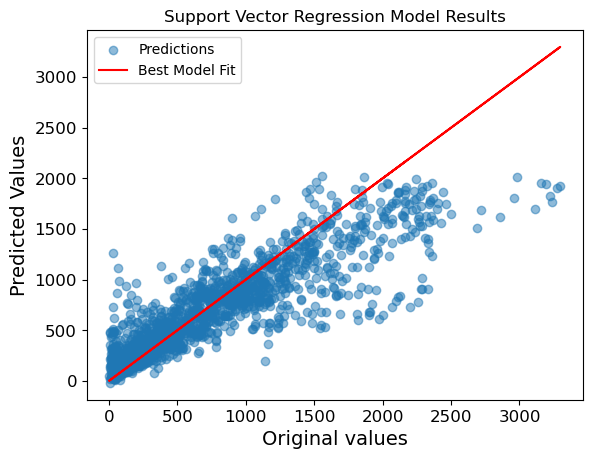


Test set RMSE: 315.602


In [68]:
# Retrain the best model on the full training set (including validation)
best_model.fit(X_train, y_train)

# Apply the best model to the test data
y_pred = best_model.predict(X_test)

# Evaluate and visualize the results on the test set
plt.scatter(y_test, y_pred, alpha=0.5, label='Predictions')
plt.plot(y_test, y_test, 'r-', label='Best Model Fit') 
plt.xlabel('Original values')
plt.ylabel('Predicted Values')
plt.title(f'{best_model_name} Model Results')
plt.legend()
plt.show()

# Print the evaluation metric on the test set
from sklearn.metrics import mean_squared_error
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"\nTest set RMSE: {rmse_test:.3f}")

## 4: Further improvements

In step 5, ChatGPT's code contains an inconsistency in the way it handles the RMSE scores. 

The code from ChatGPT uses `scoring='neg_root_mean_squared_error'` to obtain negative RMSE scores, which are then converted back to positive RMSE values by taking the negative value of the mean scores (`mean_rmse = -np.mean(linear_optimized_scores)`). This approach may aim to leverage the default behavior of model selection algorithms, which typically favor higher scores. 

However, when comparing the optimized models' RMSE values (step 5), it didn't apply the same logic. When selecting the best model, it incorrectly assumes that:

`if np.mean(linear_optimized_scores) < np.mean(svr_optimized_scores)`, the Linear Regression model is better. 

In fact, it should compare `-np.mean(linear_optimized_scores)` and `-np.mean(svr_optimized_scores)`, as these represent the actual RMSE values. 

The code should be: 

`if -np.mean(linear_optimized_scores) < -np.mean(svr_optimized_scores):` 

`best_model = linear_grid_search.best_estimator_`